In [ ]:
import torch
torch.__version__

'1.11.0+cu113'

In [ ]:
!pip list

In [ ]:
!python --version

Python 3.7.13


In [ ]:
def normal_img(input_gray_img):
  gray_img = input_gray_img.copy().astype('float32')

  min_ = gray_img.min()
  max_ = gray_img.max()

  if (min_<0):
    gray_img = gray_img + abs(min_)

  min_ = gray_img.min()
  max_ = gray_img.max()

  gray_img = min_+255*(gray_img-min_)/(max_-min_)

  min_ = gray_img.min()
  max_ = gray_img.max()

  return gray_img.astype('uint8')

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
!ls ./MyDrive/MyDrive/vs_object_n

'20220529 091059 - 0.973 0.927 - resnet18 эпох 20 батч 20 шаг 0.001 кажд 20 эпох измен в 0.1 раз.dat'
'20220529 092001 - 0.975 0.931 - resnet34 эпох 20 батч 20 шаг 0.001 кажд 20 эпох измен в 0.1 раз.dat'
'20220529 092845 - 0.988 0.923 - resnet101 эпох 20 батч 20 шаг 0.001 кажд 20 эпох измен в 0.1 раз.dat'
'20220529 094030 - 0.988 0.919 - resnet152 эпох 20 батч 20 шаг 0.001 кажд 20 эпох измен в 0.1 раз.dat'
'20220529 095649 - 0.956 0.9 - GoogLeNet эпох 20 батч 20 шаг 0.001 кажд 20 эпох измен в 0.1 раз.dat'
 imgObjectsM.zip


In [ ]:
import os
path = './MyDrive/MyDrive/vs_object_n'
print(os.listdir(path))

['20220529 091059 - 0.973 0.927 - resnet18 эпох 20 батч 20 шаг 0.001 кажд 20 эпох измен в 0.1 раз.dat', '20220529 092001 - 0.975 0.931 - resnet34 эпох 20 батч 20 шаг 0.001 кажд 20 эпох измен в 0.1 раз.dat', '20220529 092845 - 0.988 0.923 - resnet101 эпох 20 батч 20 шаг 0.001 кажд 20 эпох измен в 0.1 раз.dat', '20220529 094030 - 0.988 0.919 - resnet152 эпох 20 батч 20 шаг 0.001 кажд 20 эпох измен в 0.1 раз.dat', '20220529 095649 - 0.956 0.9 - GoogLeNet эпох 20 батч 20 шаг 0.001 кажд 20 эпох измен в 0.1 раз.dat', 'imgObjectsM.zip']


In [ ]:
zipfilename = 'imgObjectsM.zip'
imgfolder = zipfilename.split('.')[0]

In [ ]:
# распаковка файлов в эту виртуальную машину (гораздо быстрее, чем в облако Google Disk)
new_path = './'
import zipfile
with zipfile.ZipFile(os.path.join(path, zipfilename), 'r') as zip_obj:  
  zip_obj.extractall(new_path)

In [ ]:
l_dir = os.listdir(os.path.join(new_path, imgfolder))
for i in range(len(l_dir)):
  l_files = os.listdir(os.path.join(new_path, imgfolder, l_dir[i]))
  print(l_dir[i], len(l_files))

oven 100
smartstove 100
gastove 100
boiler 100
bed 100
couch 100
microwave 100
tv 100
ref 100
washer 100
bath 100
elstove 100
cabin 100


In [ ]:
l_dir

['oven',
 'smartstove',
 'gastove',
 'boiler',
 'bed',
 'couch',
 'microwave',
 'tv',
 'ref',
 'washer',
 'bath',
 'elstove',
 'cabin']

In [ ]:
import numpy as np

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import shutil # для работы с файлами
from tqdm import tqdm # прогресс бар

import imutils # для поворота изображения

In [ ]:
!rm -r ./train
!rm -r ./val

Создаем обучающую (80%) и тестовую (20%) выборки

In [ ]:
train_dir = 'train'
val_dir = 'val'

os.makedirs(os.path.join(new_path, train_dir), exist_ok=True)
os.makedirs(os.path.join(new_path, val_dir), exist_ok=True)

for dir_name in [train_dir, val_dir]:
    for class_name in l_dir: 
        os.makedirs(os.path.join(new_path, dir_name, class_name), exist_ok=True)

for class_name in l_dir:
  source_dir = os.path.join(new_path, imgfolder, class_name)
  print(source_dir)
  for i, file_name in enumerate(tqdm(os.listdir(source_dir))): 
    if i%5==0:
      dest_dir = os.path.join(new_path, val_dir, class_name) 
    else:
      dest_dir = os.path.join(new_path, train_dir, class_name) 

    if file_name.find('.jpg')>=0:
      shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))


./imgObjectsM/oven


100%|██████████| 100/100 [00:00<00:00, 7161.67it/s]


./imgObjectsM/smartstove


100%|██████████| 100/100 [00:00<00:00, 6438.31it/s]


./imgObjectsM/gastove


100%|██████████| 100/100 [00:00<00:00, 7785.25it/s]


./imgObjectsM/boiler


100%|██████████| 100/100 [00:00<00:00, 8359.18it/s]


./imgObjectsM/bed


100%|██████████| 100/100 [00:00<00:00, 6450.89it/s]


./imgObjectsM/couch


100%|██████████| 100/100 [00:00<00:00, 7862.31it/s]


./imgObjectsM/microwave


100%|██████████| 100/100 [00:00<00:00, 6801.87it/s]


./imgObjectsM/tv


100%|██████████| 100/100 [00:00<00:00, 7562.62it/s]


./imgObjectsM/ref


100%|██████████| 100/100 [00:00<00:00, 10708.50it/s]


./imgObjectsM/washer


100%|██████████| 100/100 [00:00<00:00, 5749.32it/s]


./imgObjectsM/bath


100%|██████████| 100/100 [00:00<00:00, 7676.95it/s]


./imgObjectsM/elstove


100%|██████████| 100/100 [00:00<00:00, 6298.32it/s]


./imgObjectsM/cabin


100%|██████████| 100/100 [00:00<00:00, 5692.60it/s]


In [ ]:
for dir_name in [train_dir, val_dir]:
    for class_name in l_dir: 
      print(dir_name, class_name, len(os.listdir(os.path.join(new_path, dir_name, class_name))))
    print('')

train oven 80
train smartstove 80
train gastove 80
train boiler 80
train bed 80
train couch 80
train microwave 80
train tv 80
train ref 80
train washer 80
train bath 80
train elstove 80
train cabin 80

val oven 20
val smartstove 20
val gastove 20
val boiler 20
val bed 20
val couch 20
val microwave 20
val tv 20
val ref 20
val washer 20
val bath 20
val elstove 20
val cabin 20



In [ ]:
import torch
import torchvision

from torchvision import transforms, models
train_transforms = transforms.Compose([
    
    #transforms.RandomChoice(transforms = [
    #    transforms.RandomRotation(degrees = 10),
    #    transforms.RandomRotation(degrees = -10)
    #]),

    #transforms.RandomPerspective(distortion_scale=0.05, p=0.1), 
    # наклон изображения в разные стороны, чем больше distortion_scale, тем круче
    #transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=(-0.5,0.5)),   
    #transforms.RandomVerticalFlip(p=0.5),
    #transforms.RandomResizedCrop(224), # случайно обрезаем изображение до 224*224
    #transforms.Grayscale(3),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # зеркально поворот по горизонтали
    transforms.ToTensor(), # в тензор; при этом каждый канал будет не от 0 до 255, а от 0 до 1
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)
# train_dir и val_dir - родительские папки, внутри cleaned и dirty 
# - соответственно метки изображений 0,1,2... берет из имен этих подкаталогов 

batch_size = 20
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=0) #batch_size=32
# shuffle=True - чтобы перетасовывать данные в каждую эпоху 
# (очень важно, если исп. батчи и shuffle=False, то фигня получится: 
# при загрузке нового батча будем забывать результат обучения на других батчах)
# num_workers (int, необязательно) - сколько подпроцессов использовать для загрузки данных 
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

In [ ]:
len(train_dataloader), len(train_dataset) # 13 папок (13 объектов) * 4 батча по 20 изображений

(52, 1040)

In [ ]:
len(val_dataloader), len(val_dataset) # 13 папок (13 объектов) * 1 батч по 20 изображений

(13, 260)

In [ ]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


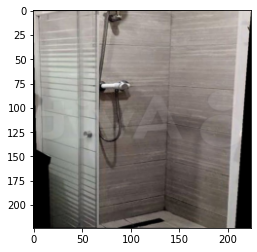

In [ ]:
X_batch, y_batch = next(iter(train_dataloader))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(X_batch[0].permute(1, 2, 0).numpy() * std + mean); 

In [ ]:
def train_model(model, loss, optimizer, scheduler, num_epochs):
    l_train = []
    l_val = []
    l_ind = []
    for epoch in range(num_epochs):
        l_ind.append(epoch)
        print('Epoch {}/{}:'.format(epoch, num_epochs - 1), flush=True)
        # сразу же выводить, а не после выхода из цикла (не буферизовать)
        
        is_stop=False
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                dataloader = train_dataloader
                scheduler.step()
                model.train()  # Set model to training mode
            else:                
                dataloader = val_dataloader
                model.eval()   # Set model to evaluate mode

            running_loss = 0.
            running_acc = 0.
            
            # Iterate over data.
            for inputs, labels in tqdm(dataloader):              
              inputs = inputs.to(device)              
              labels = labels.to(device)              
              optimizer.zero_grad()
              
              # forward and backward
              with torch.set_grad_enabled(phase == 'train'): # использовать градиенты или нет                
                preds = model(inputs) # предсказание                
                preds_class = preds.argmax(dim=1) # класс 0 nothing или 1 pen , где максимальная вероятность
                loss_value = loss(preds, labels) # ошибка
                
                # backward + optimize only if in training phase
                if phase == 'train':                  
                  loss_value.backward() # считаем частные производные, градиенты                  
                  optimizer.step() # корректируем веса
              
              # statistics
              running_loss += loss_value.item()
              running_acc += (preds_class == labels.data).float().mean()

            epoch_loss = running_loss / len(dataloader)
            epoch_acc = running_acc / len(dataloader)
            
            if phase == 'train':
                l_train.append(epoch_acc.data.cpu().item())
            else:
                l_val.append(epoch_acc.data.cpu().item())
                #if (l_train[len(l_train)-1]>=0.95) and (epoch>=120) and (l_val[len(l_val)-1]>=0.85):
                #    is_stop= True                    
                
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc), flush=True)
        if is_stop:
            break

    return model, l_ind, l_train, l_val

In [ ]:
model = models.resnet50(pretrained=True) # будем использовать предобученную сеть (на коллекции ImageNet - более млн. изображений)

In [ ]:
model.fc.weight.shape, model.fc.bias.shape

(torch.Size([1000, 2048]), torch.Size([1000]))

In [ ]:
# Отключаем градиенты для всех слоев
for param in model.parameters():
    param.requires_grad = False

In [ ]:
# Подменяем последний полносвязный слой, вместо 2048 на 1000 у нас будет классификатор 2048 на 13 (кол-во классов)
model.fc = torch.nn.Linear(model.fc.in_features, 13) 
# все тензоры должны находиться на одном устройстве, model помещать на cuda после этого шага
model.fc.weight.shape, model.fc.bias.shape

(torch.Size([13, 2048]), torch.Size([13]))

In [ ]:
model.fc.bias, model.fc.weight, model.fc.weight.data.shape, model.fc.weight.data.cpu()

(Parameter containing:
 tensor([ 0.0015,  0.0050,  0.0132,  0.0161, -0.0060,  0.0022, -0.0052,  0.0184,
          0.0149, -0.0034, -0.0191,  0.0012,  0.0011], requires_grad=True),
 Parameter containing:
 tensor([[-0.0170,  0.0013, -0.0208,  ...,  0.0141,  0.0024, -0.0025],
         [ 0.0136, -0.0107,  0.0080,  ...,  0.0151,  0.0160, -0.0027],
         [ 0.0173, -0.0024, -0.0099,  ..., -0.0024, -0.0113, -0.0058],
         ...,
         [ 0.0180,  0.0126,  0.0016,  ...,  0.0174, -0.0115,  0.0132],
         [-0.0179,  0.0114, -0.0127,  ..., -0.0190,  0.0153, -0.0096],
         [ 0.0117,  0.0078,  0.0171,  ...,  0.0029,  0.0035,  0.0005]],
        requires_grad=True),
 torch.Size([13, 2048]),
 tensor([[-0.0170,  0.0013, -0.0208,  ...,  0.0141,  0.0024, -0.0025],
         [ 0.0136, -0.0107,  0.0080,  ...,  0.0151,  0.0160, -0.0027],
         [ 0.0173, -0.0024, -0.0099,  ..., -0.0024, -0.0113, -0.0058],
         ...,
         [ 0.0180,  0.0126,  0.0016,  ...,  0.0174, -0.0115,  0.0132],
    

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)

# Decay LR by a factor of 0.1 every 7 epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
model, l_ind, l_train, l_val = train_model(model, loss, optimizer, scheduler, num_epochs=25)

Epoch 0/24:


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
100%|██████████| 52/52 [00:07<00:00,  6.67it/s]

train Loss: 1.6016 Acc: 0.5808



100%|██████████| 13/13 [00:01<00:00,  7.18it/s]

val Loss: 0.8664 Acc: 0.7962
Epoch 1/24:



100%|██████████| 52/52 [00:07<00:00,  6.90it/s]

train Loss: 0.7117 Acc: 0.8375



100%|██████████| 13/13 [00:01<00:00,  7.23it/s]

val Loss: 0.5164 Acc: 0.9038
Epoch 2/24:



100%|██████████| 52/52 [00:07<00:00,  7.01it/s]

train Loss: 0.4731 Acc: 0.8990



100%|██████████| 13/13 [00:01<00:00,  7.36it/s]

val Loss: 0.4000 Acc: 0.9077
Epoch 3/24:



100%|██████████| 52/52 [00:07<00:00,  6.94it/s]

train Loss: 0.4070 Acc: 0.9125



100%|██████████| 13/13 [00:01<00:00,  7.14it/s]

val Loss: 0.3568 Acc: 0.9308
Epoch 4/24:



100%|██████████| 52/52 [00:07<00:00,  6.95it/s]

train Loss: 0.3343 Acc: 0.9231



100%|██████████| 13/13 [00:01<00:00,  7.36it/s]

val Loss: 0.3008 Acc: 0.9192
Epoch 5/24:



100%|██████████| 52/52 [00:07<00:00,  6.98it/s]

train Loss: 0.2765 Acc: 0.9423



100%|██████████| 13/13 [00:01<00:00,  7.31it/s]

val Loss: 0.2912 Acc: 0.9231
Epoch 6/24:



100%|██████████| 52/52 [00:07<00:00,  6.99it/s]

train Loss: 0.2565 Acc: 0.9462



100%|██████████| 13/13 [00:01<00:00,  7.40it/s]

val Loss: 0.3057 Acc: 0.9038
Epoch 7/24:



100%|██████████| 52/52 [00:07<00:00,  7.02it/s]

train Loss: 0.2297 Acc: 0.9471



100%|██████████| 13/13 [00:01<00:00,  7.31it/s]

val Loss: 0.2814 Acc: 0.9077
Epoch 8/24:



100%|██████████| 52/52 [00:07<00:00,  6.98it/s]

train Loss: 0.2025 Acc: 0.9596



100%|██████████| 13/13 [00:01<00:00,  7.29it/s]

val Loss: 0.2442 Acc: 0.9269
Epoch 9/24:



100%|██████████| 52/52 [00:07<00:00,  6.92it/s]

train Loss: 0.1981 Acc: 0.9587



100%|██████████| 13/13 [00:01<00:00,  7.30it/s]

val Loss: 0.2466 Acc: 0.9269
Epoch 10/24:



100%|██████████| 52/52 [00:07<00:00,  6.98it/s]

train Loss: 0.1836 Acc: 0.9567



100%|██████████| 13/13 [00:01<00:00,  7.42it/s]

val Loss: 0.2412 Acc: 0.9231
Epoch 11/24:



100%|██████████| 52/52 [00:07<00:00,  6.96it/s]

train Loss: 0.1601 Acc: 0.9740



100%|██████████| 13/13 [00:01<00:00,  7.32it/s]

val Loss: 0.2447 Acc: 0.9346
Epoch 12/24:



100%|██████████| 52/52 [00:07<00:00,  7.02it/s]

train Loss: 0.1751 Acc: 0.9596



100%|██████████| 13/13 [00:01<00:00,  7.40it/s]

val Loss: 0.2389 Acc: 0.9231
Epoch 13/24:



100%|██████████| 52/52 [00:07<00:00,  7.01it/s]

train Loss: 0.1361 Acc: 0.9692



100%|██████████| 13/13 [00:01<00:00,  7.38it/s]

val Loss: 0.2345 Acc: 0.9346
Epoch 14/24:



100%|██████████| 52/52 [00:07<00:00,  6.99it/s]

train Loss: 0.1550 Acc: 0.9625



100%|██████████| 13/13 [00:01<00:00,  7.25it/s]

val Loss: 0.2924 Acc: 0.9000
Epoch 15/24:



100%|██████████| 52/52 [00:07<00:00,  7.01it/s]

train Loss: 0.1443 Acc: 0.9644



100%|██████████| 13/13 [00:01<00:00,  7.29it/s]

val Loss: 0.2458 Acc: 0.9231
Epoch 16/24:



100%|██████████| 52/52 [00:07<00:00,  6.90it/s]

train Loss: 0.1204 Acc: 0.9769



100%|██████████| 13/13 [00:01<00:00,  7.30it/s]

val Loss: 0.2253 Acc: 0.9346
Epoch 17/24:



100%|██████████| 52/52 [00:07<00:00,  7.00it/s]

train Loss: 0.1160 Acc: 0.9731



100%|██████████| 13/13 [00:01<00:00,  7.41it/s]

val Loss: 0.2567 Acc: 0.9269
Epoch 18/24:



100%|██████████| 52/52 [00:07<00:00,  7.00it/s]

train Loss: 0.1117 Acc: 0.9750



100%|██████████| 13/13 [00:01<00:00,  7.32it/s]

val Loss: 0.2259 Acc: 0.9385
Epoch 19/24:



100%|██████████| 52/52 [00:07<00:00,  7.01it/s]

train Loss: 0.1002 Acc: 0.9779



100%|██████████| 13/13 [00:01<00:00,  7.27it/s]

val Loss: 0.2172 Acc: 0.9346
Epoch 20/24:



100%|██████████| 52/52 [00:07<00:00,  6.98it/s]

train Loss: 0.0816 Acc: 0.9904



100%|██████████| 13/13 [00:01<00:00,  7.34it/s]

val Loss: 0.2207 Acc: 0.9385
Epoch 21/24:



100%|██████████| 52/52 [00:07<00:00,  6.99it/s]

train Loss: 0.0892 Acc: 0.9827



100%|██████████| 13/13 [00:01<00:00,  7.39it/s]

val Loss: 0.2233 Acc: 0.9346
Epoch 22/24:



100%|██████████| 52/52 [00:07<00:00,  6.92it/s]

train Loss: 0.0768 Acc: 0.9913



100%|██████████| 13/13 [00:01<00:00,  7.34it/s]

val Loss: 0.2051 Acc: 0.9462
Epoch 23/24:



100%|██████████| 52/52 [00:07<00:00,  6.97it/s]

train Loss: 0.0889 Acc: 0.9865



100%|██████████| 13/13 [00:01<00:00,  7.30it/s]

val Loss: 0.2183 Acc: 0.9423
Epoch 24/24:



100%|██████████| 52/52 [00:07<00:00,  6.95it/s]

train Loss: 0.0791 Acc: 0.9913



100%|██████████| 13/13 [00:01<00:00,  7.29it/s]

val Loss: 0.2178 Acc: 0.9462


Как изменялась точность на обучающей и тестовой выборках на протяжении 20 эпох

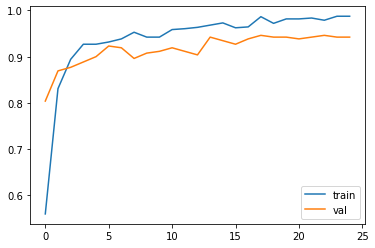

In [ ]:
# на cpu и не тензор, а конкретное значение
import matplotlib.pyplot as plt
plt.plot(l_ind, l_train, label='train')
plt.plot(l_ind, l_val, label='val')
plt.legend()
plt.show() 

In [ ]:
l_train[-1], l_val[-1]

(0.9913462996482849, 0.9461538195610046)

In [ ]:
network_info = 'resnet50 эпох 25 батч 20 шаг 0.001 кажд 20 эпох измен в 0.1 раз.dat'

import datetime 
now = datetime.datetime.now()
dt_str = str(now).replace('-', '').replace(':', '').split('.')[0]

acc_train = round(l_train[-1], 3)
acc_val = round(l_val[-1], 3)

network_info = dt_str+ ' - '+ str(acc_train)+' '+ str(acc_val) + ' - ' + network_info
network_info

'20220602 061108 - 0.991 0.946 - resnet50 эпох 25 батч 20 шаг 0.001 кажд 20 эпох измен в 0.1 раз.dat'

In [ ]:
# Сохраняем checkpoint:
checkpoint_path = os.path.join('./', network_info)
torch.save(model.state_dict(), checkpoint_path)
print("Модель сохранена {}".format(checkpoint_path))

Модель сохранена ./20220602 061108 - 0.991 0.946 - resnet50 эпох 25 батч 20 шаг 0.001 кажд 20 эпох измен в 0.1 раз.dat


In [ ]:
shutil.copy(os.path.join('./', network_info), os.path.join('./MyDrive/MyDrive/vs_object_n/', network_info))

'./MyDrive/MyDrive/vs_object_n/20220529 095649 - 0.956 0.9 - GoogLeNet эпох 20 батч 20 шаг 0.001 кажд 20 эпох измен в 0.1 раз.dat'

In [ ]:
# Создаем модель (объект класса NeuralNetwork) и загружаем параметры из checkpoint:
model = models.resnet50(pretrained=True) #NeuralNetwork()
model.fc = torch.nn.Linear(model.fc.in_features, 13) 
model.load_state_dict(torch.load(checkpoint_path))
# print(model.state_dict())

<All keys matched successfully>

In [ ]:
!nvidia-smi

Sun May 29 09:12:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    29W /  70W |   1484MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------